In [83]:
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
import math as M
from matplotlib import mlab
from matplotlib.colors import Normalize
import requests
from lxml import html
from scipy import signal
import matplotlib.colors as colors
import datetime

%matplotlib inline
data_url_1 = 'https://rawdata.oceanobservatories.org/files/RS01SLBS/LJ01A/09-HYDBBA102/2017/10/06/OO-HYVM1--YDH-2017-10-06T20:00:00.000015.mseed'
#localFileName = '../data/merged_hydrophone.mseed'

In [84]:
st = read(data_url_1)

In [85]:
st[0].stats

         network: OO
         station: HYVM1
        location: 
         channel: YDH
       starttime: 2017-10-06T20:00:00.000015Z
         endtime: 2017-10-06T20:04:59.997984Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 19199871
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 6444, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 26394624})

In [86]:
fs = st[0].stats.sampling_rate
print(fs)

64000.0


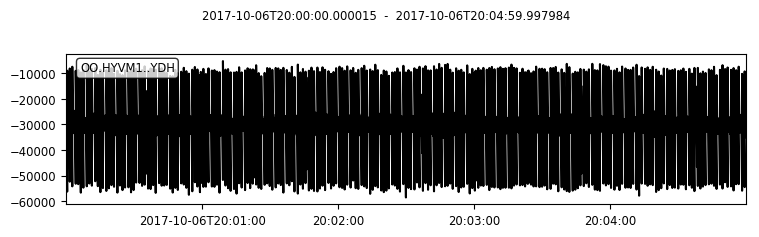

In [87]:
st[0].plot()

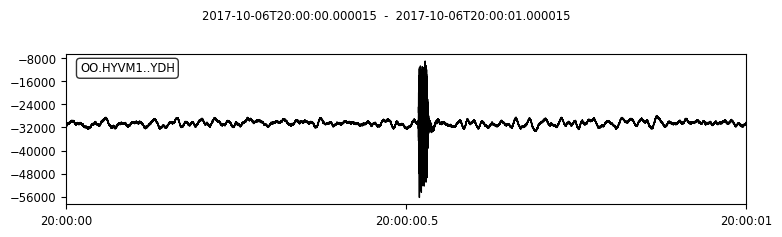

In [88]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 1
sliced = st.slice(t_start, t_end)
sliced.plot()

In [89]:
data_url_2 = 'https://rawdata.oceanobservatories.org/files/RS01SLBS/LJ01A/09-HYDBBA102/2017/10/06/OO-HYVM1--YDH-2017-10-06T20:05:00.000000.mseed'
st2 = read(data_url_2) 

In [90]:
st += st2[0]
st.merge(fill_value ='interpolate',method=1)

1 Trace(s) in Stream:
OO.HYVM1..YDH | 2017-10-06T20:00:00.000015Z - 2017-10-06T20:09:59.997999Z | 64000.0 Hz, 38399872 samples

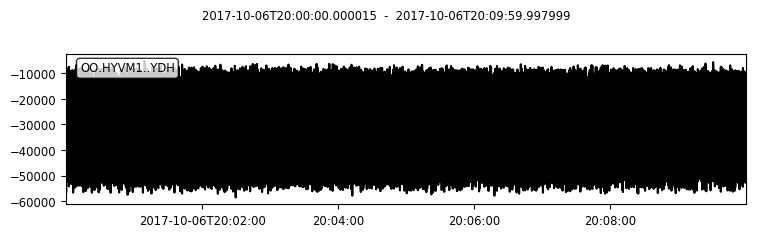

In [91]:
st[0].plot()

(0, 15000)

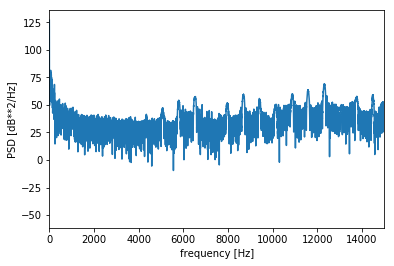

In [28]:
from scipy.fftpack import fft
x = (sliced[0].data)*np.hanning(len(sliced[0].data))
xfft = 2*np.square(fft(x,64000))/(len(x)*fs)
fre = np.linspace(1,fs,64000)
data_db = 10*np.log10(np.abs(xfft))+169-128.9
plt.plot(fre[0:32000], data_db[0:32000],label='PSD')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

# Plot Spectrogram

4000


(0, 5000)

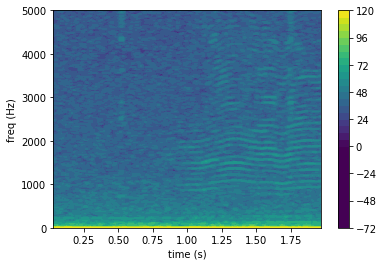

In [95]:
t_start = st[0].stats.starttime 
t_end = st[0].stats.starttime + 2
sliced = st.slice(t_start, t_end)

npts = len(sliced[0])
end = npts / fs
nfft = int(fs/16)  # number of fft points of each bin
print(nfft)
per_lap = 0.90      # percentage of overlap
nlap = int(nfft * float(per_lap))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram, freq, time = mlab.specgram(sliced[0].data,NFFT = nfft,Fs = fs,noverlap = nlap, pad_to = None)
specgram = 10 * np.log10(specgram) +169-128.9
plt.contourf(time,freq,specgram,30,vmin=0, vmax=120)
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)